# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software


### QP2. Como o desempenho do algoritmo proposto se compara ao de algoritmos da literatura quando aplicados ao DSPSP?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare
import scikit_posthocs as sp

from dspsp_analysis import metrics_dataset

%matplotlib inline

data = metrics_dataset(filepath="../hypervolume/metrics-rq2-i01-all.csv")

In [2]:
def hv_mean(data, instance_id, algorithm_id, grouping="event"):
    df = data[(data.algorithm ==  algorithm_id) & (data.instance == instance_id)]
    df = df.groupby(["instance", "algorithm", grouping], as_index=False)["hypervolume"].mean()
    return df


def hv_measures(data, grouping="event", limit=None):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            measures[inst][alg] = hv_mean(data, inst, alg, grouping)[:limit]
    return measures


def plot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Hipervolume")
    for alg in algorithms:
        plt.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    

def boxplot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.ylabel("Hipervolume")
    plt.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    plt.show()
    

def combined_plot_hv(data, inst, algorithms):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel("Hipervolume")
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    ax2.set_ylabel("Hipervolume")

    f.subplots_adjust(wspace=0.1, top=0.85)
    

In [3]:
hv_execution = hv_measures(data, grouping="execution", limit=5)
hv_event = hv_measures(data, limit=80)

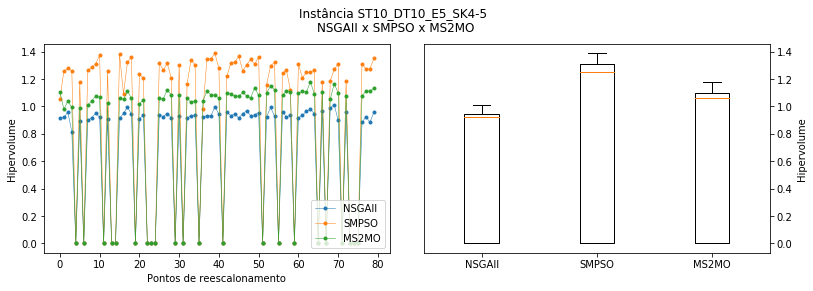

In [4]:
inst = "ST10_DT10_E5_SK4-5"
algorithms = ["NSGAII", "SMPSO", "MS2MO"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
# plot_hv(hv_event, inst, algorithms)
# boxplot_hv(hv_event, inst, algorithms)
combined_plot_hv(hv_event, inst, algorithms)

In [5]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=112.138, p=0.000000
Distribuições diferentes (rejeitar H0)


In [6]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO,NSGAII,SMPSO
MS2MO,-1.000000,8.343662e-06,6.373232e-05
NSGAII,0.000008,-1.000000e+00,9.186916e-16
SMPSO,0.000064,9.186916e-16,-1.000000e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x116a3d588>,
 <matplotlib.colorbar.ColorbarBase at 0x1173dce10>)

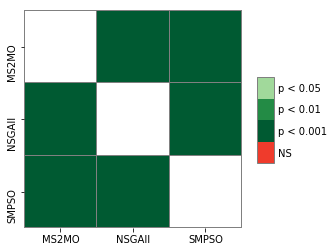

In [7]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

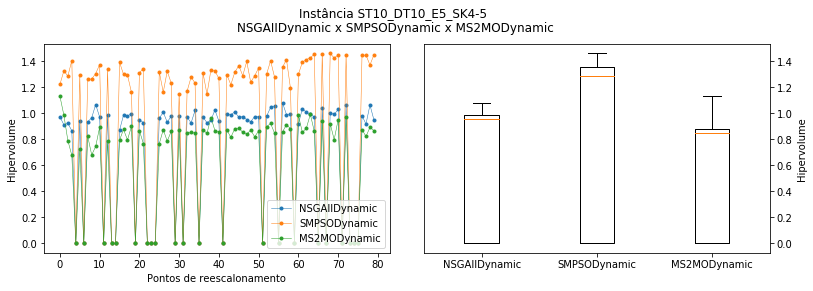

In [8]:
algorithms = ["NSGAIIDynamic", "SMPSODynamic", "MS2MODynamic"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [9]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=108.552, p=0.000000
Distribuições diferentes (rejeitar H0)


In [10]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MODynamic,NSGAIIDynamic,SMPSODynamic
MS2MODynamic,-1.000000e+00,0.000317,3.551618e-15
NSGAIIDynamic,3.171263e-04,-1.000000,3.245334e-06
SMPSODynamic,3.551618e-15,0.000003,-1.000000e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x11754fc18>,
 <matplotlib.colorbar.ColorbarBase at 0x1176a0470>)

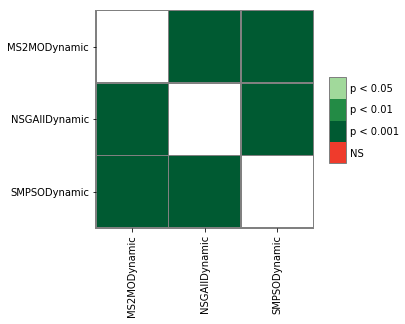

In [11]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)